### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


**KMeans 객체를 생성하고 군집화 수행**

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

**추가설명)** KMenas 파라미터에서 init은 centroid 초기값(위치)을 지정해주는 알고리즘을 선택해주는 것. 즉,'k-means++'알고리즘을 이용하여 centroid 초기값(위치)를 지정하겠다는 것)  
(초기값을 지정안하고 랜덤으로 지정해준다면 iteration을 굉장히 많이 하게 되고 최적화에 문제가 생길 수 있음  
-max_iter는 최대반복 횟수이고, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함

**labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인하고 irisDF에 'cluster' 컬럼으로 추가**

In [13]:
print(kmeans.labels_)
print(kmeans.predict(irisDF))
# 똑같은 결과가 반환됨

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [14]:
irisDF['cluster']=kmeans.labels_ # cluster 값

In [15]:
irisDF['target'] = iris.target # 실제 값

In [16]:
def rename(x):
    if x == 0:
        x = 'setosa'
    elif x == 1:
        x = 'versicolor'
    elif x == 2:
        x = 'virginica'
    return x

In [17]:
irisDF['target_name'] = irisDF['target'].apply(lambda x : rename(x))
irisDF['target_name'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: target_name, dtype: int64

In [18]:
iris_result = irisDF.groupby(['target_name','cluster'])['sepal_length'].count()
print(iris_result)
#(cluster의 0,1,2 는 타겟값의 0,1,2의 값이 아님. 타겟값과는 관계없이 매핑된 것임)
#(여기서 cluster의 1은 setosa, 2은 versicolor, 0은 virginica)

target_name  cluster
setosa       1          50
versicolor   0           2
             2          48
virginica    0          36
             2          14
Name: sepal_length, dtype: int64


**2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소**  
(기존피처가 4개라서 시각화하기 어려움. 보통 PCA를 통해 차원축소를 해서 시각화하여 보여줌)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,target_name,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,setosa,-2.888991,-0.144949


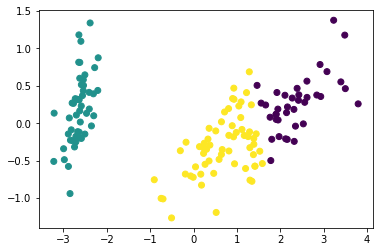

In [20]:
#marker로는 구분안하고, 색깔로만 구분하려면 이렇게 더 간단하게 코드 써서 시각화 해도 됨 
plt.scatter(x=irisDF['pca_x'], y=irisDF['pca_y'], c=irisDF['cluster']) 

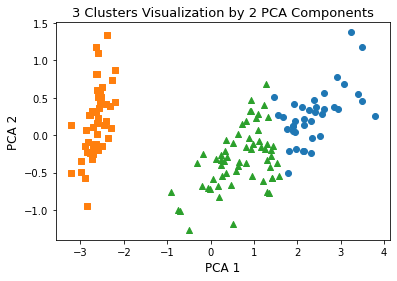

In [21]:
#(참고로, 이 코드는 책쓰실 때 흑백으로 나올경우 대비해서 marker로 구분하려고 더 복잡하게 시각화 코드 쓴거라고 하심)
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.title('3 Clusters Visualization by 2 PCA Components', fontsize=13)
plt.show()


### Clustering 알고리즘 테스트를 위한 데이터 생성 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # make_blobs는 centroid기반 샘플데이터세트를 만들 수 있는 유틸리티
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0) 
#X는 2개의 피처값, y는 cluster된 타겟값이 반환
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


**make_blobs 관련 설명**
* n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.  

* n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처
는 y 좌표상에 표현합니다.  

* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군
집 중심점의 좌표를 의미합니다.  

* cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이
터가 표준편차 0.8을 가진 값으로 만들어집니다.   
[0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내
데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭
니다.   
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다  

In [23]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


**make_blob()으로 만들어진 데이터 포인트들을 시각화**

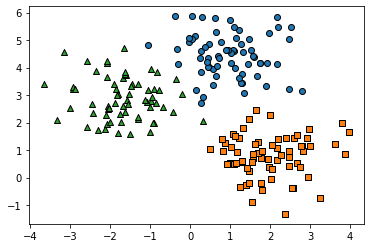

In [24]:
target_list = np.unique(y)
markers=['o', 's', '^', 'P','D','H','x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], marker=markers[target],edgecolor='k')

plt.show()

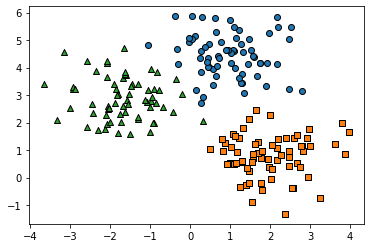

In [25]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
    # edgecolor는 marker의 테두리 color를 이야기함('face'-marker색깔지정, 'None'-테두리가 없어서 그림이 아주약간 흐릿하게 느껴짐)
plt.show()

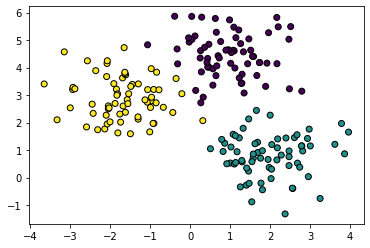

In [26]:
# 위의 코드보다 훨씬 간단하게 하려면 이렇게 하면 됨
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=clusterDF['target']) # (c=y 넣어도 결과 같음)

**K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화**

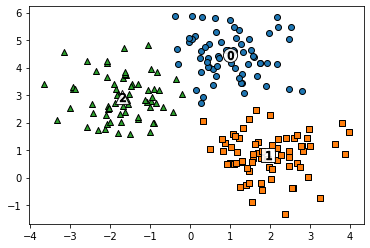

In [27]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X) # kmeans.fit.labels_ fit()호출하고 labels_속성을 사용해도 같은 값이 반환됨 
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label]) # 좌표 marker의 모양을 나타냄(동그라미/세모/네모)
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label) # 좌표 marker의 숫자를 나타냄(0/1/2)
                #%d 는 %뒤에 label 값이 숫자형이기에 %d로 써준 것

plt.show()

# 추가설명) 위의 코드 22번 marker = $%d$"에서 "$" 의미는?  
# plt.scatter()에서 marker 인자는 주로 symbol로 표현되는데, 문자(숫자)로 포맷팅 할때 $..$를 이용합니
# 아래 URL에서 marker별 symbol을 참조하실 수 있습니다. $ $ 설명은 하단쯤 나와있습니다.  
# https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers

In [28]:
kmeans.cluster_centers_  #중심위치의 좌표를 반환해줌(이 값의 shpae는 (3,2)로 즉, (군집개수, 피처개수)를 의미 )

array([[ 0.990103  ,  4.44666506],
       [ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224]])

In [29]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
#print(clusterDF.groupby(['target','kmeans_label'])['ftr1'].count()) 와 같은 결과나옴 

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


**-datasets.makeblobs외에 다른 유형의 데이터세트 만드는 것에 대한 추가설명)**  
make_blobs는 주로 centroid 데이터를 만드는데 사용됩니다.  
여러가지 유형을 가진 데이터세트를 만드는데는 sklearn.datasets내의 모듈들이 사용됩니다.  
가령 make_circles는 원형으로 분포된 데이터 세트를 만듭니다.  
make_classifications는 centroid이지만 classification까지 포함된 데이터 세트를 만듭니다.  
그외에도 달 형태로 분포된 데이터 세트를 만드는 make_moons 도 있습니다.  
보다 다양한 데이터 세트는 https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets 에서 sample generator 부분을 참조해 주시기 바랍니다.